# Approach:

Following pointers will be helpful to structure your findings.   

#### 1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI
How will you treat these values?

### Solution

In [1]:
# Importing required Libraries
# -----------------------------------------------------------------------#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts
%matplotlib inline

# -------------------- WARNINGS ----------------------------------------#
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
health_data = pd.read_csv("E:\\SIMPLI__LEARN\\Data-Science-Capstone-Projects-master\\Project 2\\Healthcare - Diabetes\\health care diabetes.csv")

In [3]:
#checking the dataset and variables and theri corresponding values
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Describing statistical data
health_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
health_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking the columns whose values are zero '0'
print("Glucose: ",(health_data.Glucose.values == 0).sum())
print("Insulin: ",(health_data.Insulin.values == 0).sum())
print("BloodPressure: ",(health_data.BloodPressure.values == 0).sum())
print("SkinThickness: ",(health_data.SkinThickness.values == 0).sum())
print("BMI: ",(health_data.BMI.values == 0).sum())

Glucose:  5
Insulin:  374
BloodPressure:  35
SkinThickness:  227
BMI:  11


In [8]:
health_data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = health_data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.nan)

In [9]:
health_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# EDA
Exploratory data Analysis

#### 2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

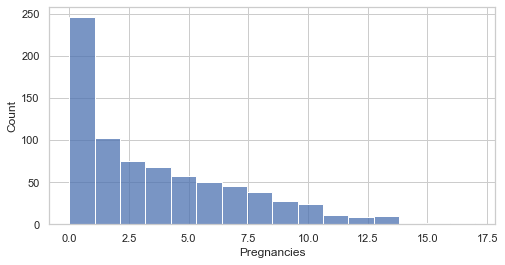

In [10]:
# CREATING Histogram
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
# plotting two histograms on the same axis
sns.histplot(health_data['Pregnancies'])
plt.show()

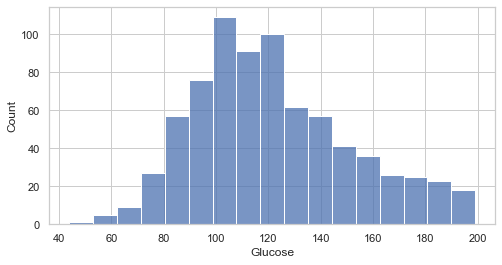

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(health_data['Glucose'])
plt.show()

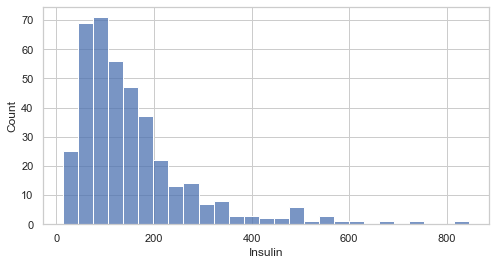

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(health_data['Insulin'])
plt.show()

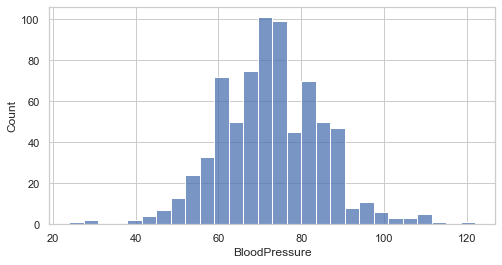

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(health_data['BloodPressure'])
plt.show()

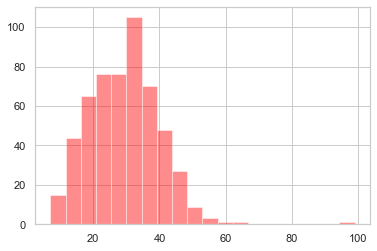

In [14]:
plt.hist(health_data['SkinThickness'], bins=20, alpha=0.45, color='red')
#sns.histplot(health_data['SkinThickness'])
plt.show()

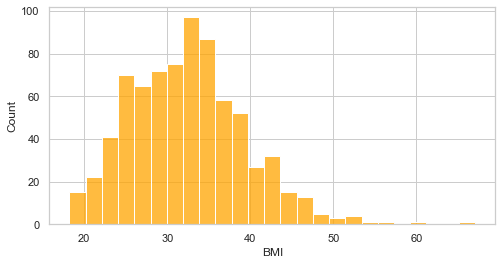

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(health_data['BMI'], color='orange')
plt.show()

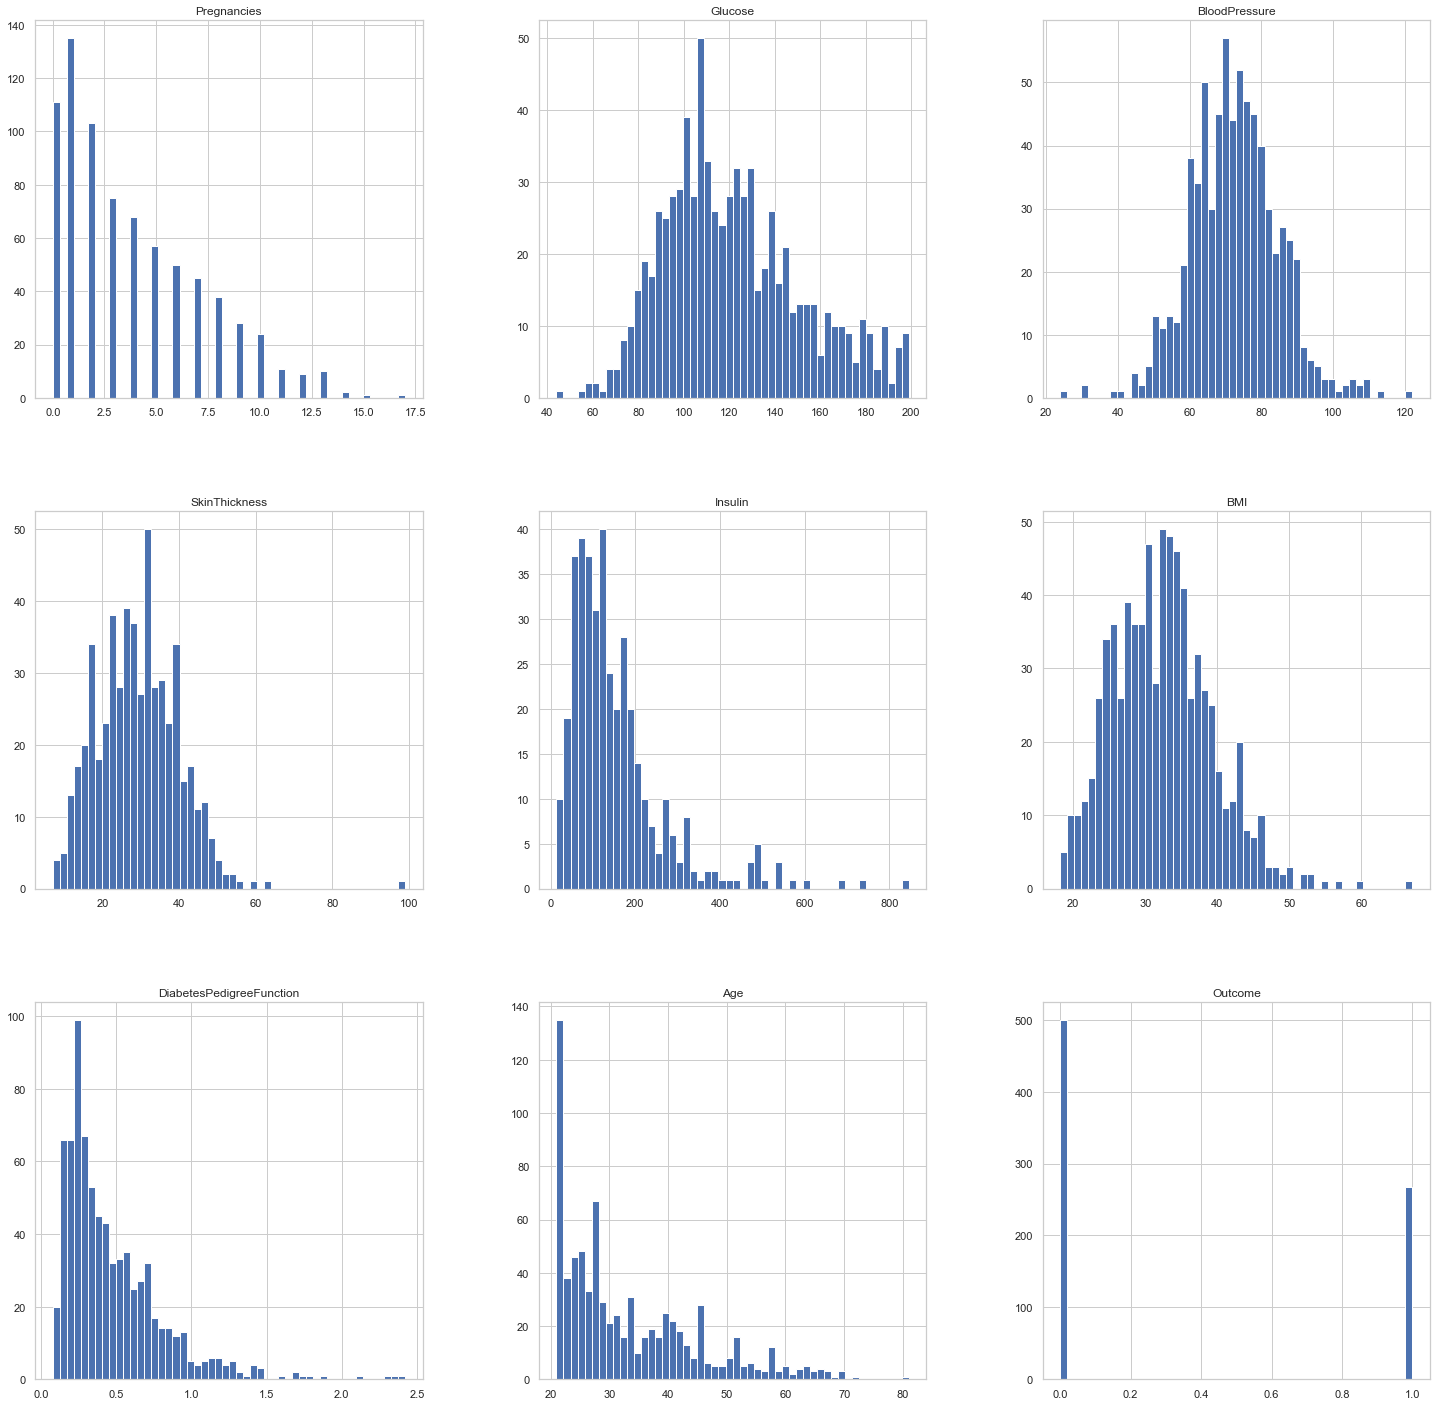

In [16]:
health_data.hist(figsize=(25,25),bins=50);

Treating Null values

In [17]:
health_data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [18]:
health_data['DiabetesPedigreeFunction'] = health_data['DiabetesPedigreeFunction'].astype('int64')

In [19]:
health_data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction      int64
Age                           int64
Outcome                       int64
dtype: object

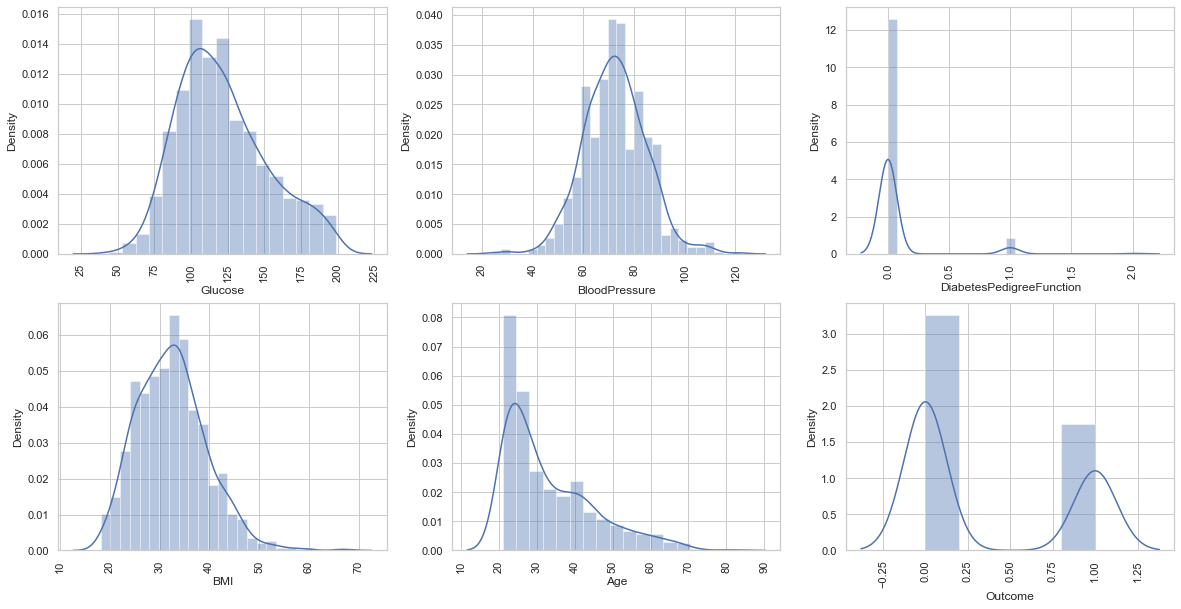

In [20]:
num_cols = ['Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'BMI', 'Age', 'Outcome']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(health_data[num_cols], ax.flatten()):
    sns.distplot(health_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

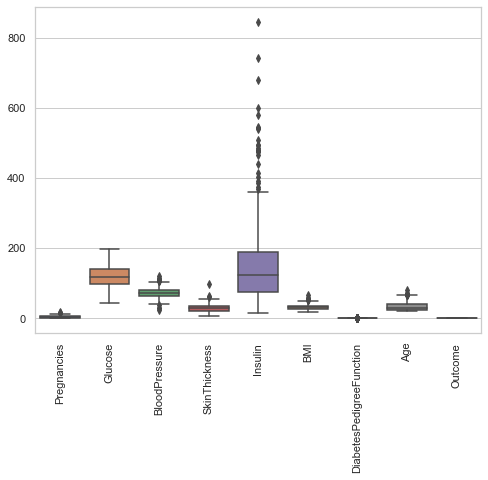

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=health_data)
plt.xticks(rotation=90)
plt.show()

#### 3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

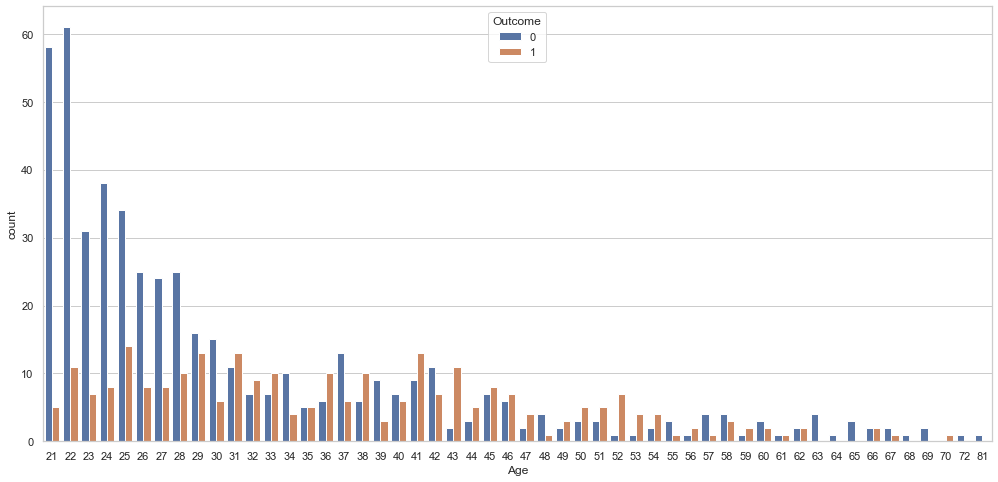

In [22]:
plt.figure(figsize=(17,8))
sns.countplot(data=health_data, x='Age', hue='Outcome')
plt.show()

So we've seen that age Below 30 There are less chances of having Diabetes

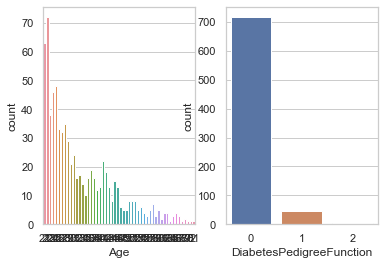

<Figure size 864x432 with 0 Axes>

In [23]:
# Creating Count Plot
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(12,6))
sns.countplot(health_data['Age'],  ax=ax[0])
sns.countplot(health_data['DiabetesPedigreeFunction'], ax=ax[1])
fig.show()


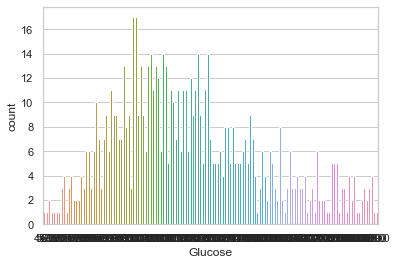

In [24]:
sns.countplot(x=health_data.Glucose, data=health_data)
plt.show()

In [25]:
# Treating missing/ Zero values
## fill Glucose with MEAN value as it ranges between 100 - 120 & BMI between 30-35
health_data.fillna(health_data['Glucose'].mean(), inplace=True)
health_data.fillna(health_data['BMI'].mean(),inplace=True)

## fill BloodPressure with MEDIAN value as it ranges between 70 - 80
health_data.fillna(health_data['BloodPressure'].median(), inplace=True)

## fill SkinThickness with MEDIAN value as it ranges between 25 - 35
health_data.fillna(health_data['SkinThickness'].median(), inplace=True)

## fill Glucose with MEDIAN value as it ranges between 100 - 130
health_data.fillna(health_data['Insulin'].median(),inplace=True)

#### 4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course       of actions.

In [26]:
# Checking Skewness of data
health_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

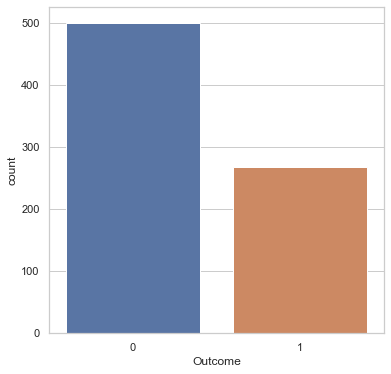

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome', data= health_data)
plt.show()

from above fig we can see that the data is imbalanced as outcome value '0' is 65% and '1'is 35%. 

#### 5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Text(0.5, 1.0, 'Age Vs Pregnancies')

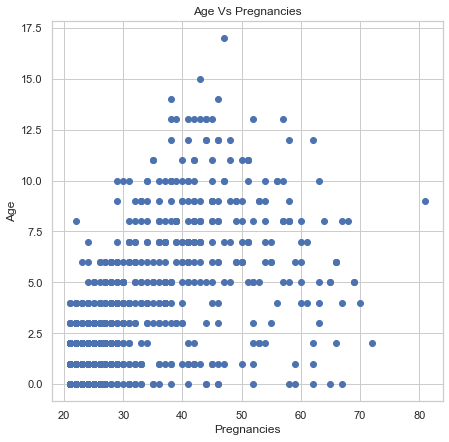

In [28]:
# Creating Scatter Plot
plt.figure(figsize=(7,7))
plt.scatter(x='Age',y='Pregnancies',data=health_data)
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.title('Age Vs Pregnancies')

Text(0.5, 1.0, 'Age Vs BloodPressure')

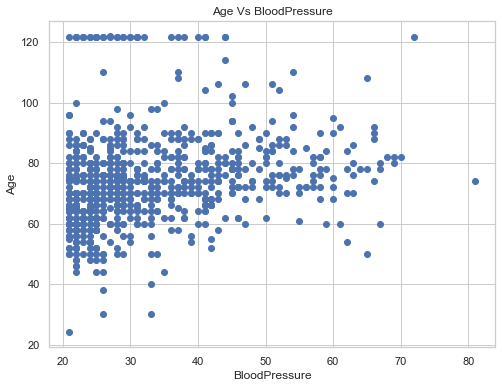

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x='Age',y='BloodPressure',data=health_data)
plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.title('Age Vs BloodPressure')

Text(0.5, 1.0, 'Age vs Glucose')

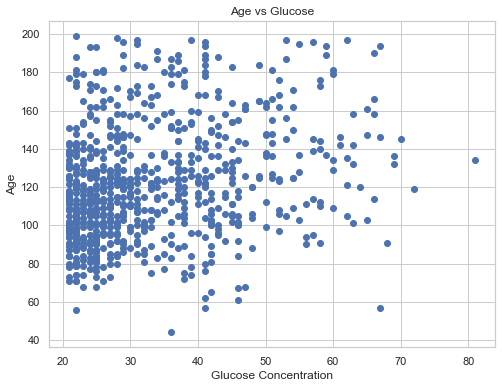

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x='Age',y='Glucose',data=health_data)
plt.xlabel('Glucose Concentration')
plt.ylabel('Age')
plt.title('Age vs Glucose')

Text(0.5, 1.0, 'Age Vs Insulin')

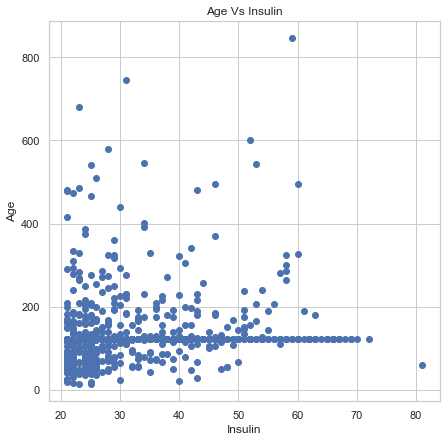

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(x='Age',y='Insulin',data=health_data)
plt.xlabel('Insulin')
plt.ylabel('Age')
plt.title('Age Vs Insulin')

Text(0.5, 1.0, 'Glucose vs BMI vs Age')

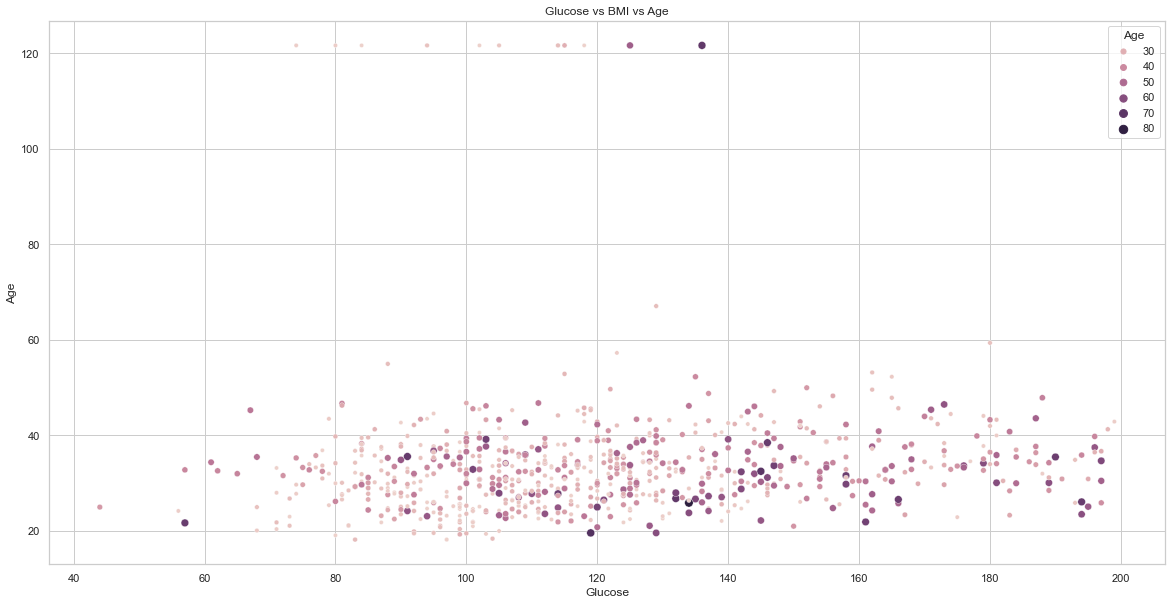

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=health_data, x='Glucose', y='BMI', hue='Age', size='Age')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Glucose vs BMI vs Age')


#### 6.	Perform correlation analysis. Visually explore it using a heat map.
(Note: Do not focus on visualization aspects when working with SAS)

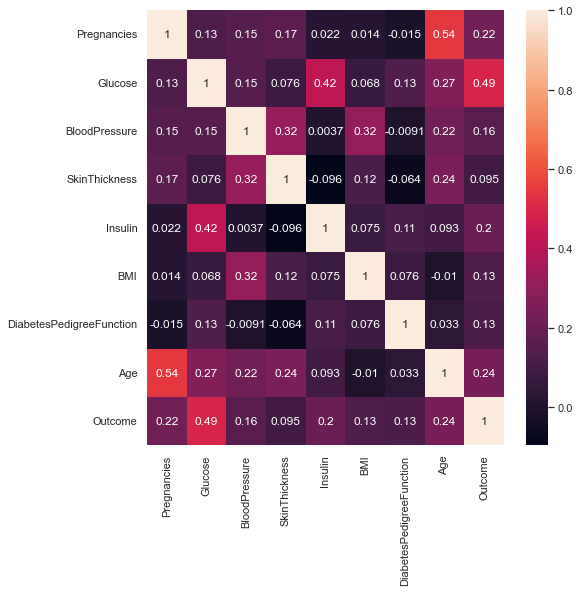

In [33]:
# Corelation using heat Map
plt.figure(figsize=(8,8))
hm = sns.heatmap(data=health_data.corr(), annot=True)
plt.show()

In [34]:
# saving as a CSV file
health_data.to_excel('E:\\SIMPLI__LEARN\\health_data11.xlsx')

##### According to observation, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome

* Here we can see that "Outcome" has the strong positive correlation with "Glucose" whereas it almost has no correlation with DiabetesPedigreeFunction.
* "SkinThickness" and "Insulin" has almost no correlation with "Pregnancies".
* There is a strong correlation between independent features which are "Insulin and Glucose", "BMI & SkinThickness & BloodPressure", "Age and Pregnancies".


# Model

#### 7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.       Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

* It is noteworthy that cross-validation should be applied properly to address imbalance problems.
* Stratified k-fold cross validation is a better approach when dealing with bias data. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.
* It is important to perform feature scaling post splitting the data into training and testing. If not done so, there will be data leakage from test data to train data

In [35]:
# Extracting Features
X = health_data.iloc[:,:-1].values
# Extracting Target
y = health_data.iloc[:, 8].values

In [36]:
# Normalizing the all the features 
# Importing preprocessing Library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [37]:
'''Using Stratified KFold so that each split is going to have some percentage of each class 
which tries to minimize the effect of each class on the result. It is better to use this
technique when you have an imbalanced dataset.'''
# Importing Strtified cross validation fromm preprocessing
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
#X is the feature set and y is the target
# Splitting data using cross validation
for train_index, test_index in skf.split(X,y): 

    X_train, X_test = X[train_index], X[test_index] 

    y_train, y_test = y[train_index], y[test_index]

#### 8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.
(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)
* We have properly labeled data Wwe are predicting if someone is having diabetes or not the final   label can be 1 or 0.
* Data is noise-free. For the diabetes data set we cannot have a Glucose level as 0 or 10000. It’s   practically impossible.
* Hence K-Nearest Neighbour Classifier is aplicable.

## K-NN Classifier

In [38]:
# Import K_NN Classifier 
from sklearn.neighbors import KNeighborsClassifier
# Importing libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
knn = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [39]:
y_pred = knn.predict(X_train)

##### **Confusion Matrix**

It can be used to find the number of correct and incorrect entries.

*   If an individual does not  have Diabetes and the expected value states that they don't have, it is a true negative (TN), i.e., the actual value is 0 and the predicted value is also 0.

*   If an individual doesnt have Diabetes but the expected value states that they have, it is a false positive (FP), i.e., the actual value is 0 and the value expected is 1.

*   If an individual has Diabetes but the expected value states that they dont have, it is a false negative (FN), i.e., the real value is 1 and the value expected is 0.

*   If an individual has Diabetes and the expected value also says that they have Diabetes, it is True Positive (TP), i.e., the actual value is 1 and the predicted value is also 1.

In [40]:
# Confusion matrix
from sklearn import metrics

# For Training Dataset
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, y_pred)))
print("Confusion Matrics: ")
print(confusion_matrix(y_train, y_pred))

Accuracy_Score = 0.773121387283237
Confusion Matrics: 
[[406  44]
 [113 129]]


In [41]:
# for testing Dataset
y_pred1 = knn.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, y_pred1)))
print("Confusion Matrics: ")
print(confusion_matrix(y_test, y_pred1))

Accuracy_Score = 0.7368421052631579
Confusion Matrics: 
[[45  5]
 [15 11]]


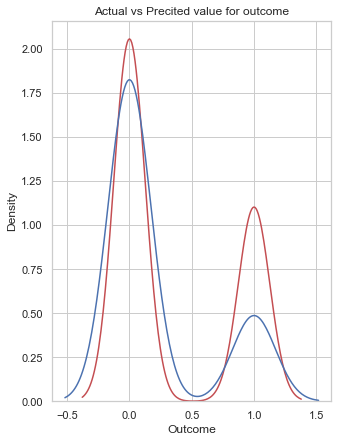

In [42]:
# plotting Actual vale of Outcome vs Predicted vale
plt.figure(figsize=(5, 7))
ax = sns.distplot(health_data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()

### Model Comparision
Comparing with other models accuracy score

In [43]:
# ---------------- Classifiers -------------------------------------- #

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [44]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))


In [45]:
for name, model in classification_models:
  skf = StratifiedKFold(n_splits=10)
  result = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100 , result.std()*100))

Logistic Regression: Mean Accuracy = 74.88% - SD Accuracy = 5.21%
K Nearest Neighbor: Mean Accuracy = 75.13% - SD Accuracy = 3.94%
Kernel SVM: Mean Accuracy = 76.57% - SD Accuracy = 4.36%
Naive Bayes: Mean Accuracy = 74.35% - SD Accuracy = 3.05%
Decision Tree: Mean Accuracy = 71.48% - SD Accuracy = 5.09%
Random Forest: Mean Accuracy = 76.94% - SD Accuracy = 5.59%


## Random Forest

In [46]:
# The best Model is random Forest so trying to fit train data in RF
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
rfc_pred = rfc.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_pred)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

* Getting the accuracy score for Random Forest

In [48]:
y_pred2 = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, y_pred2)))

Accuracy_Score = 0.7763157894736842


In [49]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

[[43  7]
 [10 16]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.70      0.62      0.65        26

    accuracy                           0.78        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.77      0.78      0.77        76



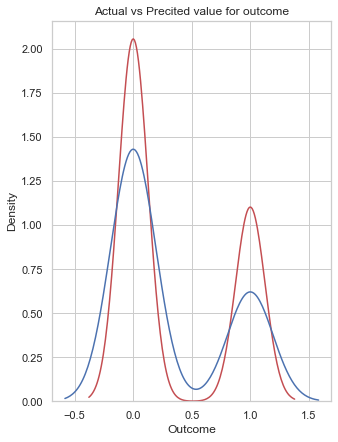

In [50]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(health_data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()


#### 9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as       possible to explain what values of these parameter you settled for? any why?

## AUC/ ROC curve
* For KNN Model

model 1 AUC score: 0.6615384615384616


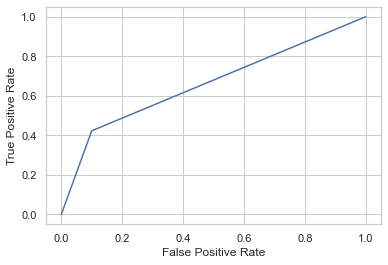

In [51]:
#AUC/ Roc Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred1):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
plot_roc_curve(y_test, y_pred1)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred1)}') 

### AUC / ROC
For Random Forest

model 1 AUC score: 0.7376923076923078


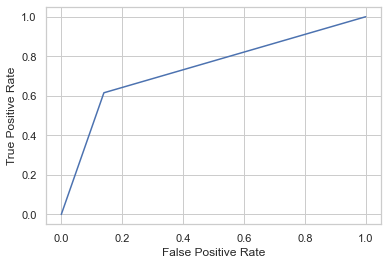

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred2):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
plot_roc_curve(y_test, y_pred2)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred2)}') 

### classification report 

In [53]:
print("K-NN: ")
print(classification_report(y_test, y_pred1))

K-NN: 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        50
           1       0.69      0.42      0.52        26

    accuracy                           0.74        76
   macro avg       0.72      0.66      0.67        76
weighted avg       0.73      0.74      0.72        76



In [54]:
print("Random Forest:")
print(classification_report(y_test, y_pred2))

Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.70      0.62      0.65        26

    accuracy                           0.78        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.77      0.78      0.77        76



#### Sensitivity Recall

In [55]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred1)
Specificity = metrics.recall_score(y_test, y_pred1, pos_label=0)
print("Specificity;",Specificity)
print("Sensitivity_recall:",Sensitivity_recall)

Specificity; 0.9
Sensitivity_recall: 0.4230769230769231


## Conclusion
* A test with a specificity ratio of 90% means that, 90% of people who do not have the disease will test negative using this diagnostic test (a true negative). The test will correctly identify 90% of people who do not have the disease

* The K-NN Classifier is predicts False positive and False negative scores are better

#### 10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must           entail the following: 

    a)	Pie chart to describe the diabetic/non-diabetic population
    b)	Scatter charts between relevant variables to analyse the relationships
    c)	Histogram/frequency charts to analyse the distribution of the data
    d)	Heatmap of correlation analysis among the relevant variables
    e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for           these age brackets using a bubble chart. 
    
#### Answer ->   Solution in Tableau